## **🎬 Movie Ratings Prediction Model**

### Necessary Libraries

In [3]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

**Background**

The TMDB Movie Database is a comprehensive dataset containing information about movies. It includes columns such as ID, Title, Average Vote, Vote Count, Status, Release Date, Revenue, Runtime, and various other attributes.

Please find the details for the dataset attributes:-

1. **id** :- Unique identifier for each movie.
2. **title** :- Title of the movie.
3. **vote_average** :- Average vote or rating given by viewers.
4. **vote_count** :- Total count of votes received for the movie.
5. **status** :- The status of the movie (e.g.,         Released, Rumored, Post Production, etc.).
6. **release_date** :- Date when the movie was released.
7. **revenue** :- Total revenue generated by the movie.
8. **runtime** :- Duration of the movie in minutes.
9. **adult** :- Indicates if the movie is suitable only for adult audiences.
10. **backdrop_path** :- URL of the backdrop image for the movie.
11. **budget** :- Budget allocated for the movie.
12. **homepage** :- Official homepage URL of the movie.
13. **imdb_id** :- IMDb ID of the movie. 
14. **original_title** :- Original title of the movie
15. **overview** :- Brief description or summary of the movie.
16. **popularity** :- Popularity score of the movie
17. **poster_path** :- URL of the movie poster image.
18. **tagline** :- Catchphrase or memorable line associated with the movie.
19. **genres** :- List of genres the movie belongs to.
20. **production_companies** :- List of production companies involved in the movie. 
21. **production_countries** :- List of countries involved in the movie production.
22. **spoken_languages** :- List of languages spoken in the movie
23. **keywords** :- Keywords associated with the movie.
24. **original_language** :- Original language in which the movie was produced.

**Case Study**


The dataset here gives the massive information about the movies and their IMDB scores respectively. We are going to analyze each and every factors which can influence the imdb ratings so that we can predict better results.The movie with the higher imdb score is more successful as compared to the movies with low imdb score. 

**Orignal Dataset Inspection**

Reading the orignal dataset and checking the attributes keeping data from specific columns and dropping the unnecessary columns and make a new modified dataset so that we do not have to read the full dataset again and again ...

In [4]:
df = pd.read_csv("TMDB_movie_dataset_v11.csv")  # Read the CSV file into a DataFrame

df.drop(  # Drop the unnecessary columns 'backdrop_path', 'poster_path' etc and those Columns with majority NULL Values.
    columns=[
        "backdrop_path",
        "poster_path",
        "homepage",
        "tagline",
        "keywords",
        "spoken_languages",
        "original_title",
        "production_companies",
        "id",
    ],
    inplace=True,
)

df = df[
    (df["adult"] == False) & (df["status"] == "Released")
]  # Keep only rows where the 'adult' column is False and the 'status' column is "Released"

df = df.rename(  # Rename the "vote_average" column to "average_rating" and "orignal_language" to "language"
    columns={"vote_average": "average_rating", "original_language": "language"}
)

df.drop(
    columns=["adult", "status", "imdb_id"], inplace=True
)  # Drop the more useless column

df.to_csv(
    "TMDB_movie_dataset_modified.csv", index=False
)  # Save the Modified DataFrame back to the CSV file

**Reading the new "Modified Dataset"**

In [5]:
df = pd.read_csv("TMDB_movie_dataset_modified.csv")
df.head()

,title,average_rating,vote_count,release_date,revenue,runtime,budget,language,overview,popularity,genres,production_countries
0,Inception,8.364,34495,2010-07-15,825532764,148,160000000,en,"Cobb, a skilled thief who commits corporate es...",83.952,"Action, Science Fiction, Adventure","United Kingdom, United States of America"
1,Interstellar,8.417,32571,2014-11-05,701729206,169,165000000,en,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","United Kingdom, United States of America"
2,The Dark Knight,8.512,30619,2008-07-16,1004558444,152,185000000,en,Batman raises the stakes in his war on crime. ...,130.643,"Drama, Action, Crime, Thriller","United Kingdom, United States of America"
3,Avatar,7.573,29815,2009-12-15,2923706026,162,237000000,en,"In the 22nd century, a paraplegic Marine is di...",79.932,"Action, Adventure, Fantasy, Science Fiction","United States of America, United Kingdom"
4,The Avengers,7.710,29166,2012-04-25,1518815515,143,220000000,en,When an unexpected enemy emerges and threatens...,98.082,"Science Fiction, Action, Adventure",United States of America


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982859 entries, 0 to 982858
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   title                 982849 non-null  object 
 1   average_rating        982859 non-null  float64
 2   vote_count            982859 non-null  int64  
 3   release_date          834717 non-null  object 
 4   revenue               982859 non-null  int64  
 5   runtime               982859 non-null  int64  
 6   budget                982859 non-null  int64  
 7   language              982859 non-null  object 
 8   overview              787299 non-null  object 
 9   popularity            982859 non-null  float64
 10  genres                640211 non-null  object 
 11  production_countries  546747 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 90.0+ MB


Converting the **date** to **"datetime"** format

In [7]:
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
# Drop rows with NaT values in release_date

df = df.dropna(subset=["release_date"])

Dropping those movies that have **"revenue",** **"runtime"** & **"budget"** all **0** (zero)

In [8]:
df = df[~((df["revenue"] == 0) & (df["runtime"] == 0) & (df["budget"] == 0))]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657696 entries, 0 to 982858
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   title                 657694 non-null  object        
 1   average_rating        657696 non-null  float64       
 2   vote_count            657696 non-null  int64         
 3   release_date          657696 non-null  datetime64[ns]
 4   revenue               657696 non-null  int64         
 5   runtime               657696 non-null  int64         
 6   budget                657696 non-null  int64         
 7   language              657696 non-null  object        
 8   overview              627491 non-null  object        
 9   popularity            657696 non-null  float64       
 10  genres                506941 non-null  object        
 11  production_countries  445762 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory us

**Checking missing values per column...**

In [10]:
missing_values_per_column = df.isnull().sum()
print("Missing values per column:")
print(missing_values_per_column)

Missing values per column:
title                        2
average_rating               0
vote_count                   0
release_date                 0
revenue                      0
runtime                      0
budget                       0
language                     0
overview                 30205
popularity                   0
genres                  150755
production_countries    211934
dtype: int64


**Dropping the rows with missing values...**

In [11]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379730 entries, 0 to 982855
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   title                 379730 non-null  object        
 1   average_rating        379730 non-null  float64       
 2   vote_count            379730 non-null  int64         
 3   release_date          379730 non-null  datetime64[ns]
 4   revenue               379730 non-null  int64         
 5   runtime               379730 non-null  int64         
 6   budget                379730 non-null  int64         
 7   language              379730 non-null  object        
 8   overview              379730 non-null  object        
 9   popularity            379730 non-null  float64       
 10  genres                379730 non-null  object        
 11  production_countries  379730 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory us

**Checking for Missing Values in each column...**

In [12]:
missing_values_per_column = df.isnull().sum()
print("Missing values per column:")
print(missing_values_per_column)

Missing values per column:
title                   0
average_rating          0
vote_count              0
release_date            0
revenue                 0
runtime                 0
budget                  0
language                0
overview                0
popularity              0
genres                  0
production_countries    0
dtype: int64


**Shape of dataset:**

In [13]:
df.shape

(379730, 12)

**Removing the duplicate values in the dataset...**

In [14]:
df.drop_duplicates(inplace=True)
df.shape

(379701, 12)

In [15]:
df.tail()

,title,average_rating,vote_count,release_date,revenue,runtime,budget,language,overview,popularity,genres,production_countries
982835,Deira Diaries,0.0,0,2021-03-19,0,128,0,ml,It is the story about a man told through the v...,0.600,Drama,India
982836,Disillusioned,0.0,0,2020-06-25,0,23,0,ko,A man left the city to live in the countryside...,0.600,Drama,South Korea
982838,LGBT You Are Not Alone,0.0,0,2020-06-06,0,53,0,lv,A documentary about LGBT+ community and bullyi...,0.600,Documentary,Latvia
982848,Personality Meet: Enid Blyton,0.0,0,1946-06-24,0,1,0,en,A brief feature on author Enid Blyton at home.,0.600,Documentary,United Kingdom
982855,Patarouva,0.0,0,1959-09-25,0,97,0,fi,Kaius Kannisto a bachelor who has experienced ...,0.841,"Drama, Romance",Finland


**Displaying the data type of the dataset attributes**

In [16]:
df.dtypes

title                           object
average_rating                 float64
vote_count                       int64
release_date            datetime64[ns]
revenue                          int64
runtime                          int64
budget                           int64
language                        object
overview                        object
popularity                     float64
genres                          object
production_countries            object
dtype: object

#### "We can say we have the dataset divided into categorical and numeric columns"

**Categorical Columns**

    title
    language
    overview
    genres
    production_countries

**Numerical Columns**

    average_rating
    vote_count
    revenue
    runtime
    budget 
    popularity 

**Five point summary for the numerical columns in the dataset**

In [17]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
average_rating,379701.0,3.3557,0.0,0.0,4.0,6.167,10.0,3.213932
vote_count,379701.0,55.440346,0.0,0.0,1.0,6.0,34495.0,549.16477
release_date,379701,1996-09-01 20:59:47.627106432,1865-01-01 00:00:00,1981-12-25 00:00:00,2008-07-12 00:00:00,2018-02-22 00:00:00,2057-01-01 00:00:00,NaN
revenue,379701.0,1892949.248704,0.0,0.0,0.0,0.0,3000000000.0,28249582.203497
runtime,379701.0,68.918791,0.0,23.0,80.0,96.0,14400.0,59.089507
budget,379701.0,720440.861947,0.0,0.0,0.0,0.0,888000000.0,7568501.556171
popularity,379701.0,2.335239,0.0,0.6,0.841,1.74,2994.357,12.02972


**Boolean check for the missing values in the dataset**

In [18]:
df.isna().any()

title                   False
average_rating          False
vote_count              False
release_date            False
revenue                 False
runtime                 False
budget                  False
language                False
overview                False
popularity              False
genres                  False
production_countries    False
dtype: bool

**Making separate columns for "Date" and keeping the movies after 1920 because actual usable data lies in this range**


In [19]:
# Extract year, month, and day of the week from release_date
df["release_year"] = df["release_date"].dt.year
df["release_month"] = df["release_date"].dt.month
df["release_day_of_week"] = df["release_date"].dt.dayofweek

df = df[(df["release_year"] > 1919) & (df["release_year"] < 2025)]

df.head()

,title,average_rating,vote_count,release_date,revenue,runtime,budget,language,overview,popularity,genres,production_countries,release_year,release_month,release_day_of_week
0,Inception,8.364,34495,2010-07-15,825532764,148,160000000,en,"Cobb, a skilled thief who commits corporate es...",83.952,"Action, Science Fiction, Adventure","United Kingdom, United States of America",2010,7,3
1,Interstellar,8.417,32571,2014-11-05,701729206,169,165000000,en,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",2014,11,2
2,The Dark Knight,8.512,30619,2008-07-16,1004558444,152,185000000,en,Batman raises the stakes in his war on crime. ...,130.643,"Drama, Action, Crime, Thriller","United Kingdom, United States of America",2008,7,2
3,Avatar,7.573,29815,2009-12-15,2923706026,162,237000000,en,"In the 22nd century, a paraplegic Marine is di...",79.932,"Action, Adventure, Fantasy, Science Fiction","United States of America, United Kingdom",2009,12,1
4,The Avengers,7.710,29166,2012-04-25,1518815515,143,220000000,en,When an unexpected enemy emerges and threatens...,98.082,"Science Fiction, Action, Adventure",United States of America,2012,4,2


**Setting a threshold for "language"**

Filtering the dataframe and keeping only those languages that have at least 3000 movies released.

In [20]:
language_counts = df["language"].value_counts()
threshold = 3000
languages_to_keep = language_counts[language_counts >= threshold].index
# Filter the DataFrame to keep only the selected languages
df = df[df["language"].isin(languages_to_keep)]

**Setting a threshold for "countries"**

Filtering the dataframe and keeping only those countries that have at least 20 movies to their name.

In [21]:
country_counts = df["production_countries"].value_counts()
countries_to_drop = country_counts[country_counts < 20].index
# Drop the rows from the DataFrame where production_countries is in the countries_to_drop
df = df[~df["production_countries"].isin(countries_to_drop)]

**Information about dataset till now:**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302738 entries, 0 to 982848
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   title                 302738 non-null  object        
 1   average_rating        302738 non-null  float64       
 2   vote_count            302738 non-null  int64         
 3   release_date          302738 non-null  datetime64[ns]
 4   revenue               302738 non-null  int64         
 5   runtime               302738 non-null  int64         
 6   budget                302738 non-null  int64         
 7   language              302738 non-null  object        
 8   overview              302738 non-null  object        
 9   popularity            302738 non-null  float64       
 10  genres                302738 non-null  object        
 11  production_countries  302738 non-null  object        
 12  release_year          302738 non-null  int32         
 13  rele

### *Exploratory Data Analysis on cleaned dataset...* 

Following is the graph plotted for "Number of Movies Released Over the Years" from 1920-2024

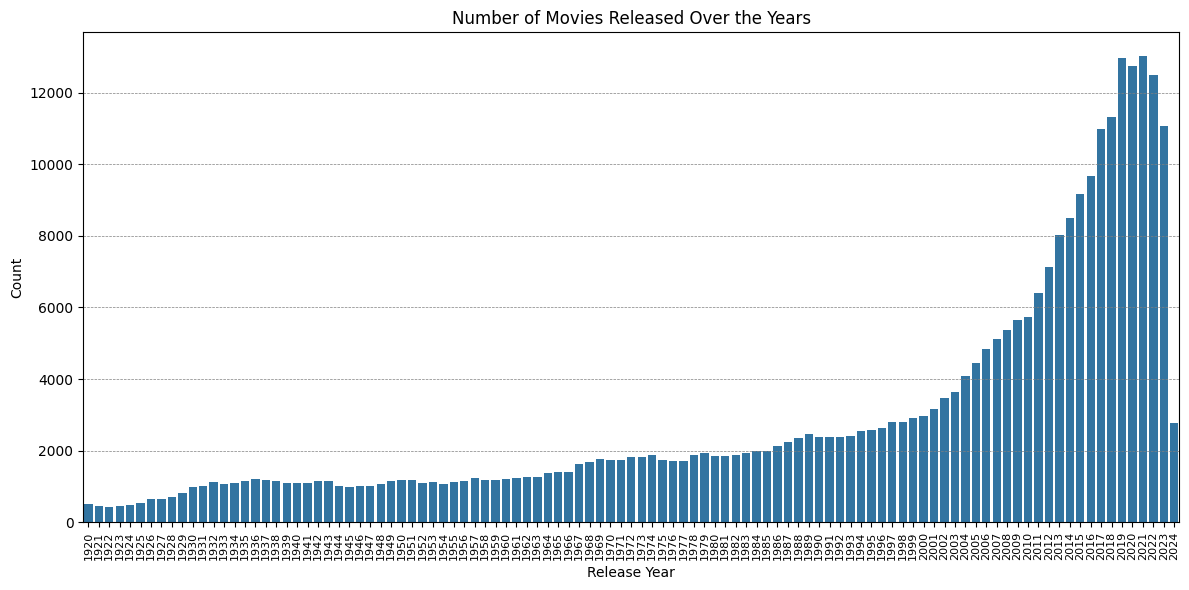

In [23]:
df["release_date"] = pd.to_datetime(
    df["release_date"], errors="coerce"
)  # Ensure 'release_date' is a datetime object

df["release_year"] = df["release_date"].dt.year  # Extract year from release_date

# Create the count plot with improved x-axis label handling
plt.figure(figsize=(12, 6))
sns.countplot(x="release_year", data=df)
plt.title("Number of Movies Released Over the Years")
plt.xticks(rotation=90, fontsize=8)  # Rotate and adjust font size
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.grid(True, linestyle="--", linewidth=0.5, color="gray", which="both", axis="y")
plt.tight_layout()
plt.show()

Following is the graph plotted for "Number of Movies Specified by Languages" considering only top 10 Languages

C:\Users\hp\AppData\Local\Temp\ipykernel_1524\169644062.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


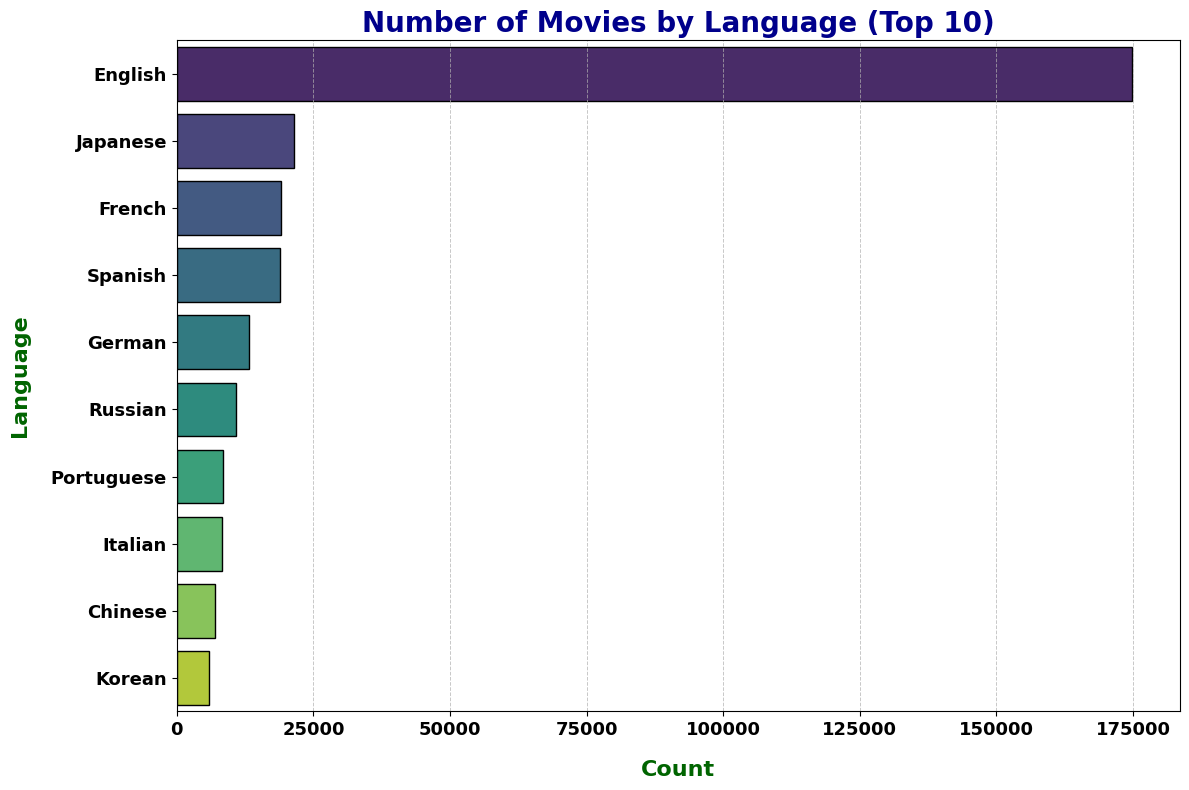

In [24]:
# Updated dictionary to map language codes to full names
language_full_names = {
    "en": "English",
    "ko": "Korean",
    "fr": "French",
    "ja": "Japanese",
    "it": "Italian",
    "pt": "Portuguese",
    "es": "Spanish",
    "hi": "Hindi",
    "cn": "Chinese",
    "de": "German",
    "sv": "Swedish",
    "zh": "Chinese",
    "ru": "Russian",
    "tl": "Tagalog",
}

top_languages = (
    df["language"].value_counts().nlargest(10).index
)  # Limit to top 10 languages for better visualization
df["language_full"] = df["language"].map(
    language_full_names
)  # Map language codes to full names
top_language_df = df[
    df["language"].isin(top_languages)
]  # Filter for only the top languages

plt.figure(figsize=(12, 8))
sns.countplot(
    y="language_full",
    data=top_language_df,
    order=top_languages.map(language_full_names.get),
    palette="viridis",
    edgecolor="black",
)

plt.title(  # Title and labels with styling
    "Number of Movies by Language (Top 10)",
    fontsize=20,
    weight="bold",
    color="darkblue",
)
plt.xlabel("Count", fontsize=16, weight="bold", color="darkgreen", labelpad=15)
plt.ylabel("Language", fontsize=16, weight="bold", color="darkgreen", labelpad=15)
plt.xticks(fontsize=13, weight="bold", color="black")
plt.yticks(fontsize=13, weight="bold", color="black")

# Add grid for x-axis
plt.grid(axis="x", linestyle="--", linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

Following is the Box plot for distribution of "Average rating by Languages" considering only top all languages

C:\Users\hp\AppData\Local\Temp\ipykernel_1524\3594513035.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


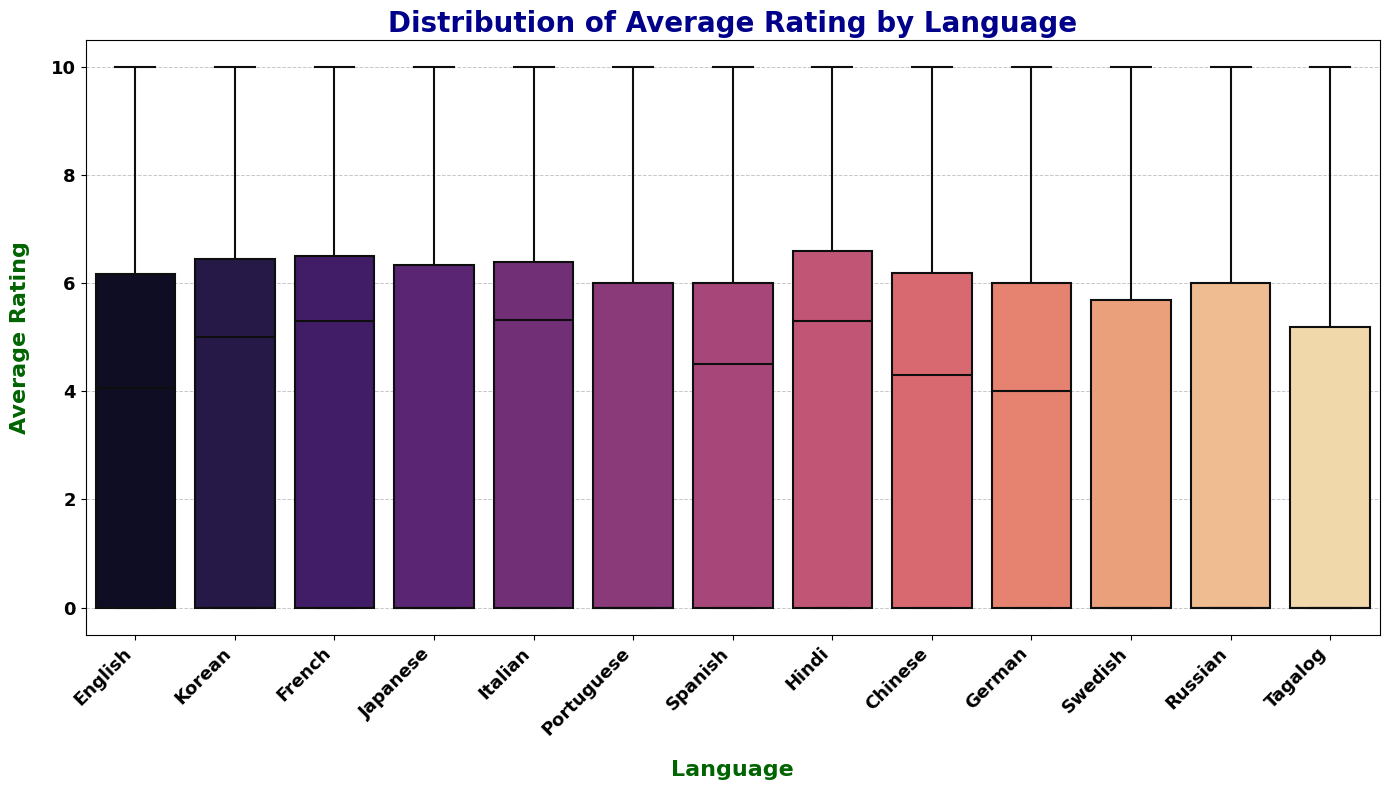

In [25]:
# Updated dictionary to map language codes to full names
language_full_names = {
    "en": "English",
    "ko": "Korean",
    "fr": "French",
    "ja": "Japanese",
    "it": "Italian",
    "pt": "Portuguese",
    "es": "Spanish",
    "hi": "Hindi",
    "cn": "Chinese",
    "de": "German",
    "sv": "Swedish",
    "zh": "Chinese",
    "ru": "Russian",
    "tl": "Tagalog",
}


df["language_full"] = df["language"].map(
    language_full_names
)  # Map full names to the 'language' column in the DataFrame for better labels

plt.figure(figsize=(14, 8))  # Plotting
sns.boxplot(
    x="language_full", y="average_rating", data=df, palette="magma", linewidth=1.5
)

plt.title(  # Title and labels with styling
    "Distribution of Average Rating by Language",
    fontsize=20,
    weight="bold",
    color="darkblue",
)
plt.xlabel("Language", fontsize=16, weight="bold", color="darkgreen", labelpad=15)
plt.ylabel("Average Rating", fontsize=16, weight="bold", color="darkgreen", labelpad=15)
plt.xticks(rotation=45, ha="right", fontsize=13, weight="bold", color="black")
plt.yticks(fontsize=13, weight="bold", color="black")

plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.7)
# Add grid for y-axis
plt.tight_layout()

plt.show()

### Univariate Analysis

#### Histograms plotted for univariate analysis of "Numerical Data":

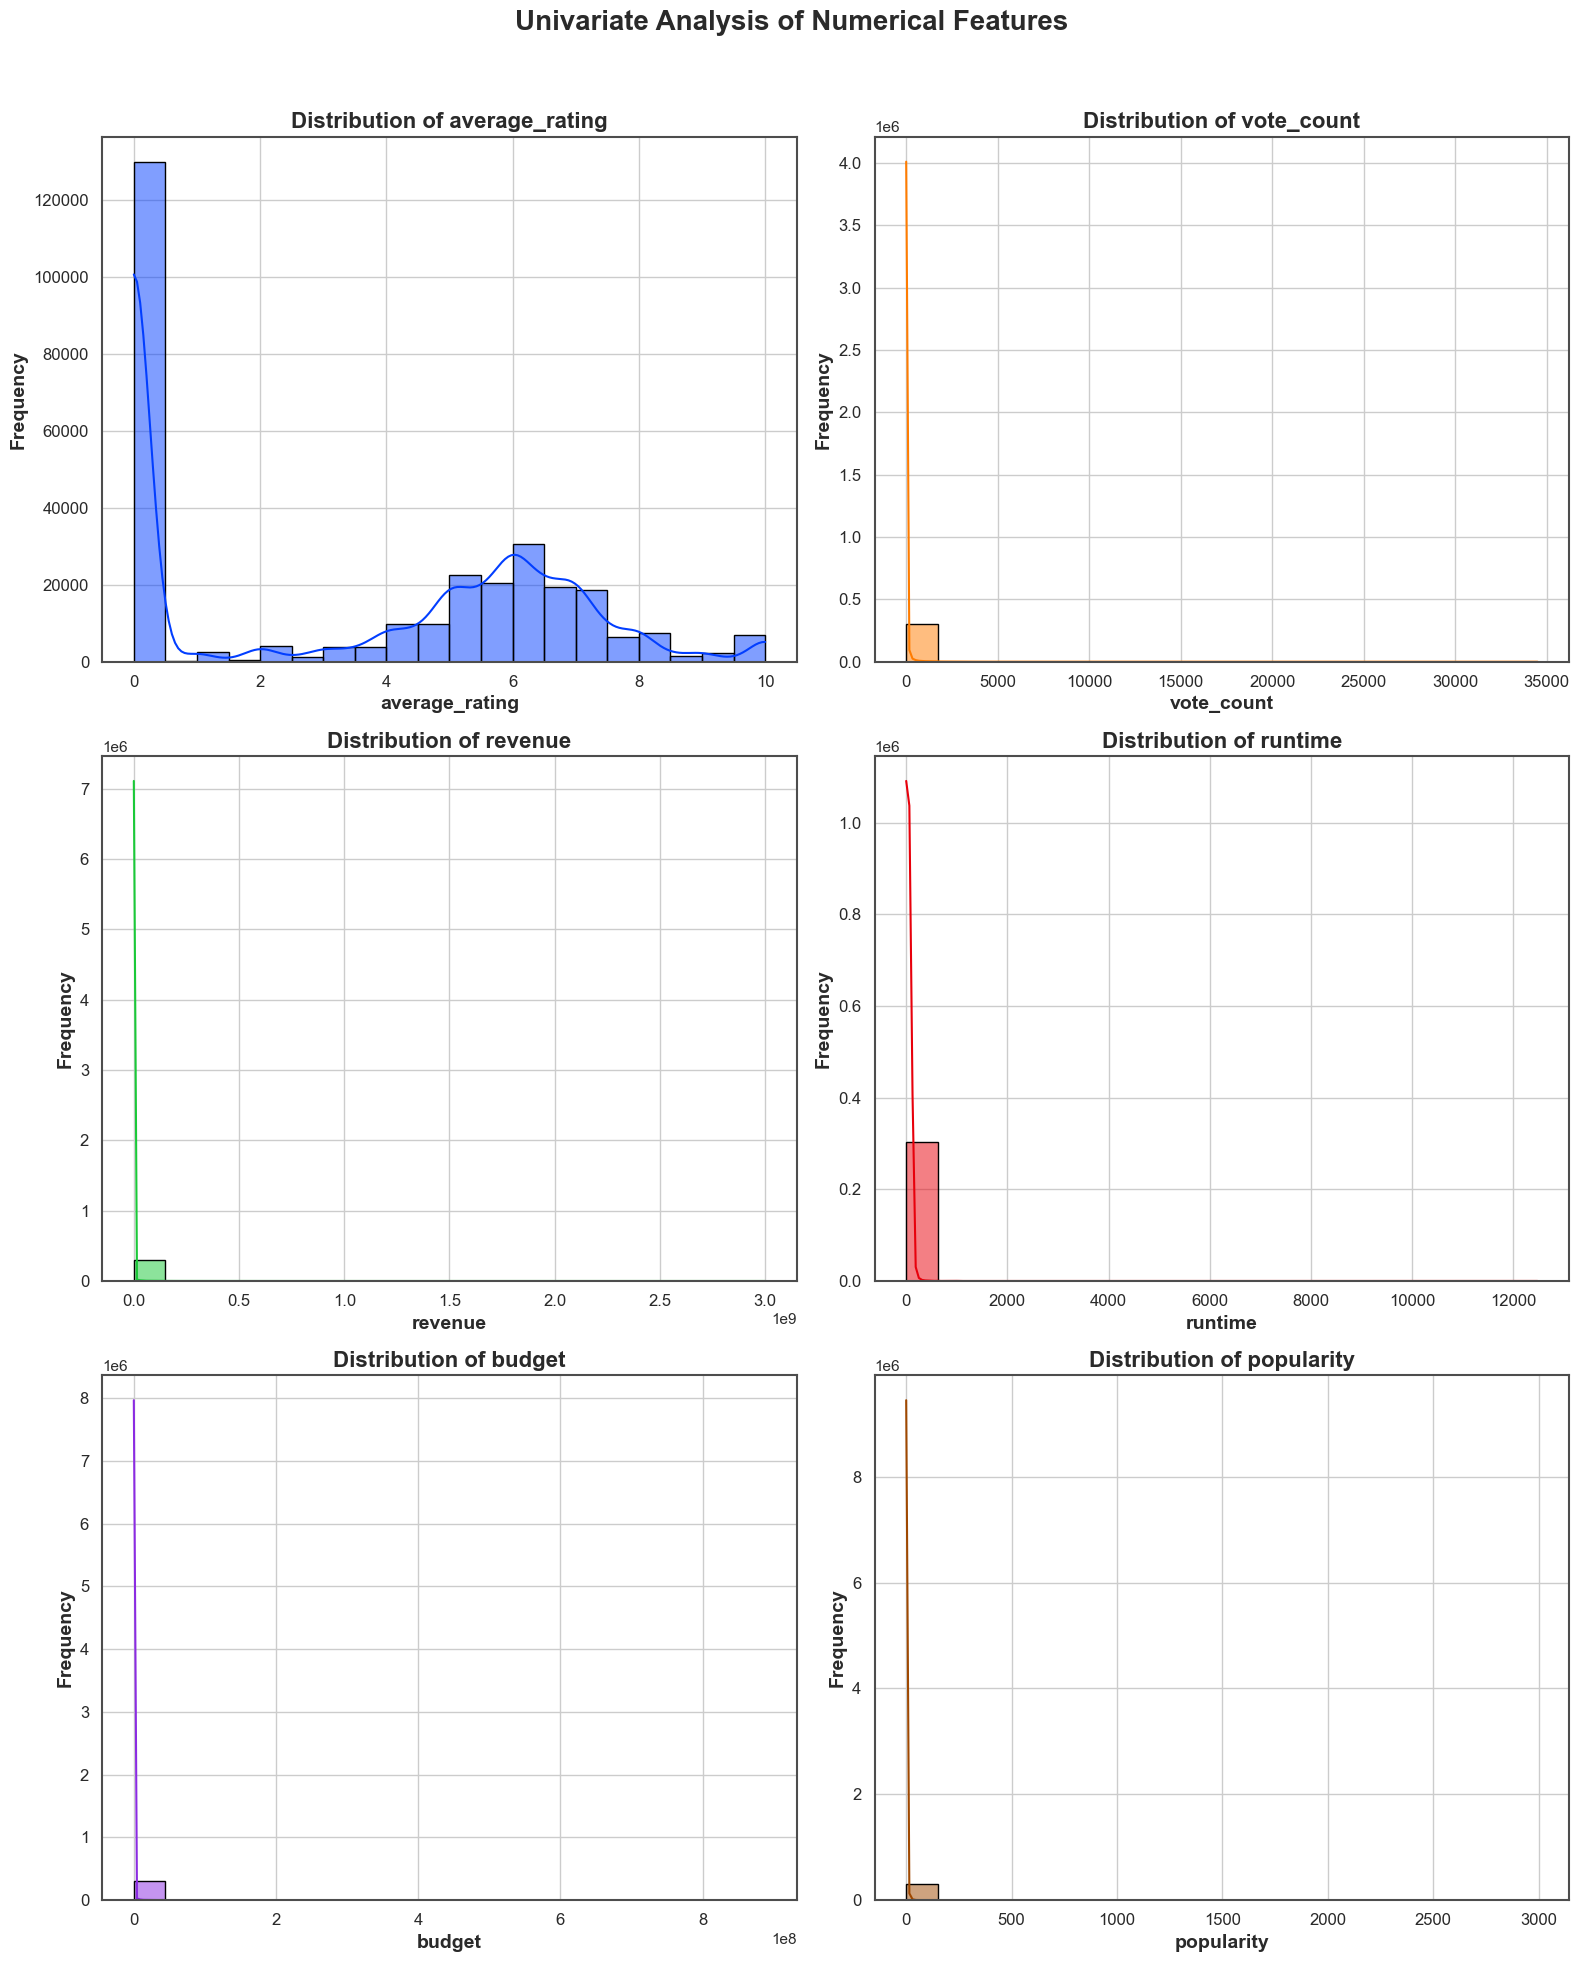

In [26]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
sns.set_theme(style="whitegrid")  # Standard white background

palette = sns.color_palette(
    "bright", len(numerical_features)
)  # Vibrant color palette for bars

fig, axes = (
    plt.subplots(  # Create subplots with 2 plots per row, keeping the layout simple and colorful
        nrows=len(numerical_features) // 2 + len(numerical_features) % 2,
        ncols=2,
        figsize=(16, 20),
    )
)

axes = axes.flatten()

for i, feature in enumerate(
    numerical_features
):  # Loop through features to create a histogram for each with bright colors and dark text

    sns.histplot(
        df[feature], bins=20, kde=True, ax=axes[i], color=palette[i], edgecolor="black"
    )

    axes[i].set_title(
        f"Distribution of {feature}", fontsize=16, fontweight="bold", color="#2A2A2A"
    )

    axes[i].set_xlabel(feature, fontsize=14, fontweight="bold", color="#2A2A2A")

    axes[i].set_ylabel(
        "Frequency", fontsize=14, fontweight="bold", color="#2A2A2A"
    )  # Darken the axis tick labels for contrast on the white background

    axes[i].tick_params(
        colors="#2A2A2A", labelsize=12
    )  # Adding a clean border around each plot

    for spine in axes[i].spines.values():
        spine.set_edgecolor("#4D4D4D")
        spine.set_linewidth(1.5)


for j in range(i + 1, len(axes)):  # Remove any empty subplots
    fig.delaxes(axes[j])


plt.suptitle(  # Set a dark title for the entire figure
    "Univariate Analysis of Numerical Features",
    fontsize=20,
    fontweight="bold",
    color="#2A2A2A",
)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit suptitle
plt.show()

### Bivariate Analysis Graphs

#### Scatter Plot for Relationships:

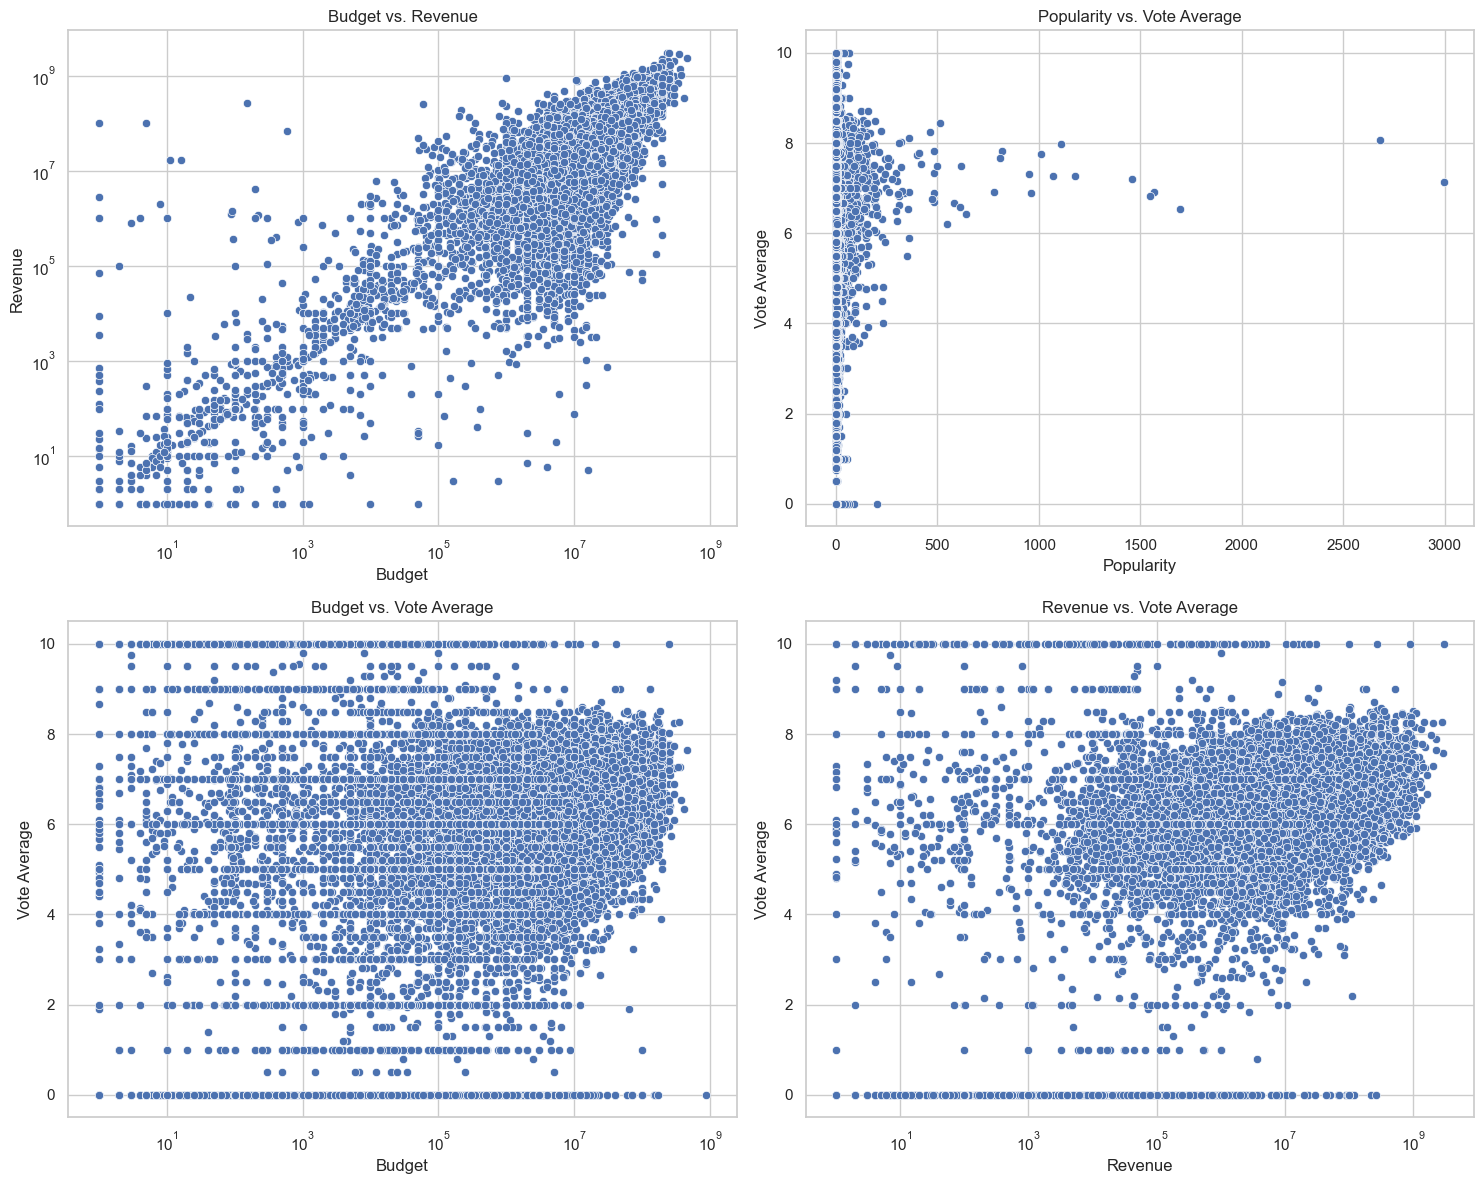

In [27]:
# Create 2x2 subplots to display four bivariate relationships
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Budget vs. Revenue
sns.scatterplot(x="budget", y="revenue", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Budget vs. Revenue")
axes[0, 0].set_xlabel("Budget")
axes[0, 0].set_ylabel("Revenue")
axes[0, 0].set_xscale("log")
axes[0, 0].set_yscale("log")

# Popularity vs. Vote Average
sns.scatterplot(x="popularity", y="average_rating", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Popularity vs. Vote Average")
axes[0, 1].set_xlabel("Popularity")
axes[0, 1].set_ylabel("Vote Average")

# Budget vs. Vote Average
sns.scatterplot(x="budget", y="average_rating", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Budget vs. Vote Average")
axes[1, 0].set_xlabel("Budget")
axes[1, 0].set_ylabel("Vote Average")
axes[1, 0].set_xscale("log")

# Revenue vs. Vote Average
sns.scatterplot(x="revenue", y="average_rating", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Revenue vs. Vote Average")
axes[1, 1].set_xlabel("Revenue")
axes[1, 1].set_ylabel("Vote Average")
axes[1, 1].set_xscale("log")

plt.tight_layout()
plt.show()

### Genre Distribution 

#### Graph for Genre Distribution (Top 10)

C:\Users\hp\AppData\Local\Temp\ipykernel_1524\3411848514.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


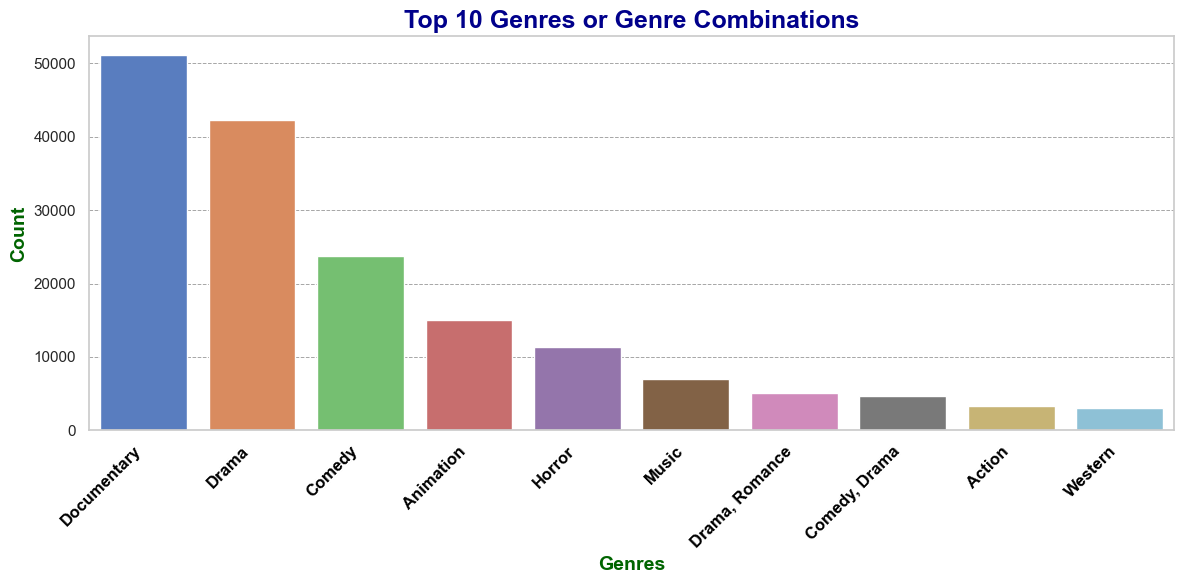

In [28]:
# Genre distribution
plt.figure(figsize=(12, 6))

if "genres" in df.columns:  # Check if 'genres' column exists
    genre_counts = df["genres"].value_counts().head(10)  # Top 10 genres or combinations
    sns.barplot(
        x=genre_counts.index, y=genre_counts.values, palette="muted"
    )  # Changed to a muted color palette

    # Improve text appearance
    plt.xticks(
        rotation=45, ha="right", fontsize=12, weight="bold", color="black"
    )  # Enhanced x-tick labels
    plt.title(
        "Top 10 Genres or Genre Combinations",
        fontsize=18,
        weight="bold",
        color="darkblue",
    )  # Enhanced title
    plt.xlabel(
        "Genres", fontsize=14, weight="bold", color="darkgreen"
    )  # Enhanced x-label
    plt.ylabel(
        "Count", fontsize=14, weight="bold", color="darkgreen"
    )  # Enhanced y-label

    plt.grid(  # Add grid for better readability
        axis="y", linestyle="--", linewidth=0.7, alpha=0.7, color="gray"
    )  # Vertical grid lines for better readability

    plt.tight_layout()  # Adjust layout to fit text
    plt.show()
else:

    print(
        "The 'genres' column is not found in your DataFrame."
    )  # Handle the case where 'genres' column is missing

### Multivariate Analysis

#### Scatter Plot for relationship between Budget & Revenue:

In [29]:
# Spacer to improve layout
plt.figure(figsize=(18, 1))
plt.show()

# Budget vs Revenue with Popularity Color
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x="budget",
    y="revenue",
    hue="popularity",
    size="popularity",
    palette="cool",
    sizes=(20, 200),
    alpha=0.7,
    edgecolor="black",
)
plt.xscale("log")  # Log scale for better visibility
plt.yscale("log")  # Log scale for better visibility
plt.title(
    "Budget vs Revenue (Color: Popularity)",
    fontsize=20,
    fontweight="bold",
    color="#333333",
)
plt.xlabel("Budget (Log Scale)", fontsize=14, color="#333333")
plt.ylabel("Revenue (Log Scale)", fontsize=14, color="#333333")
plt.legend(title="Popularity", loc="upper left", fontsize=12, title_fontsize="13")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

<Figure size 1800x100 with 0 Axes>

### Time Series Analysis

#### Line Graph for average revenue generated by movies over the years:

<Figure size 1800x100 with 0 Axes>

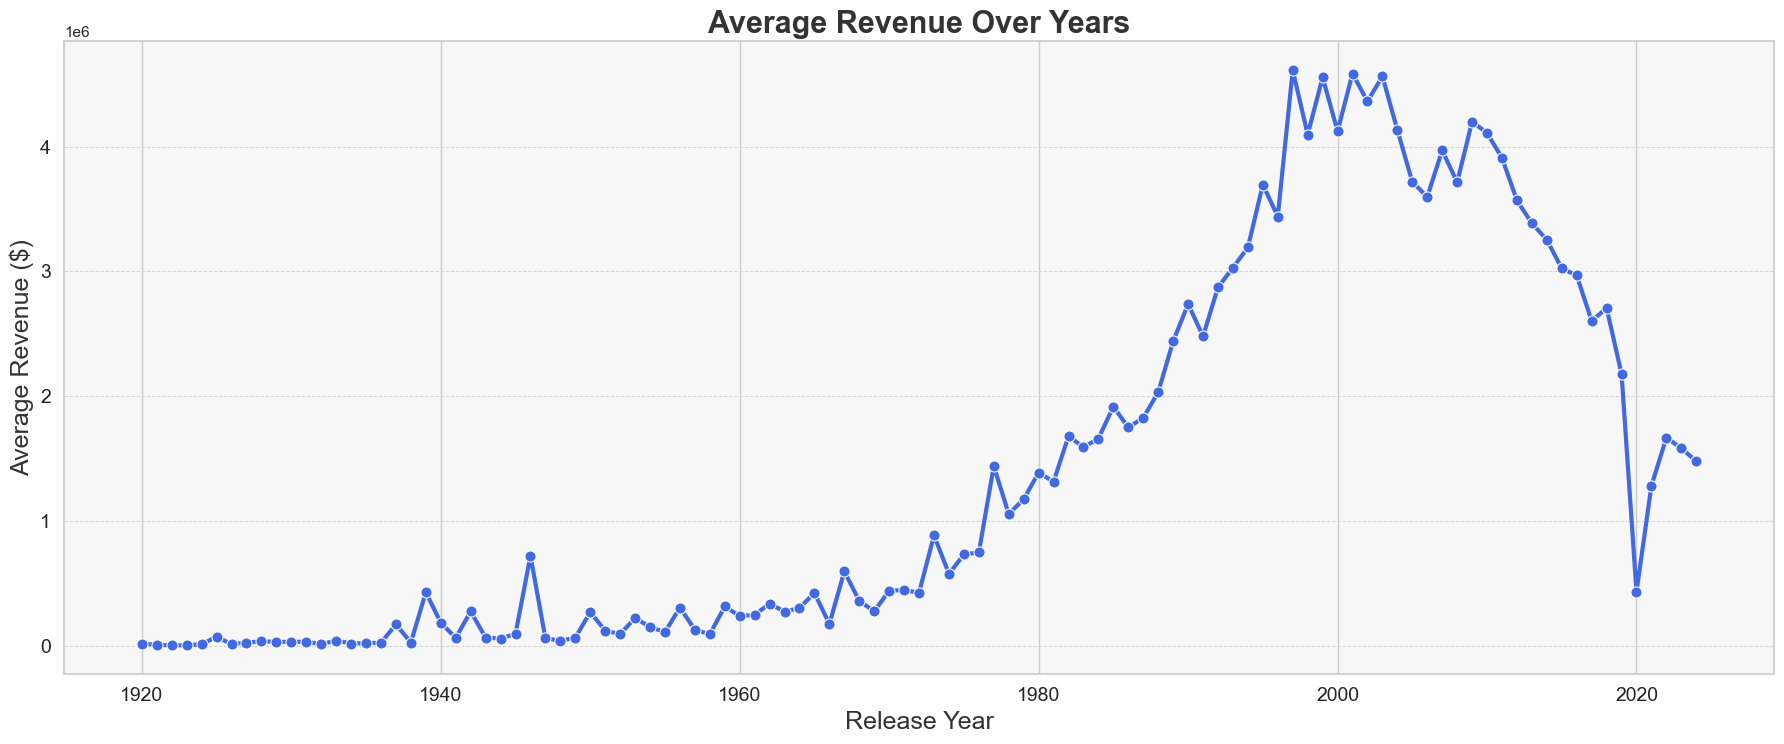

In [30]:
plt.figure(figsize=(18, 1))  # Spacer to improve layout
plt.show()

plt.figure(figsize=(18, 8))  # Time Series: Revenue Trend Over Time
plt.title("Average Revenue Over Years", fontsize=22, fontweight="bold", color="#333333")

df_yearly_revenue = (
    df.groupby("release_year")["revenue"].mean().reset_index()
)  # Calculate average revenue per year

sns.lineplot(  # Plot average revenue with markers
    data=df_yearly_revenue,
    x="release_year",
    y="revenue",
    color="royalblue",
    linewidth=3,
    marker="o",  # Add markers to the line
    markersize=8,  # Size of the markers
)

plt.xlabel("Release Year", fontsize=18, color="#333333")
plt.ylabel(
    "Average Revenue ($)", fontsize=18, color="#333333"
)  # Added currency sign for clarity
plt.tick_params(axis="both", labelsize=14)
plt.grid(True, linestyle="--", linewidth=0.7, color="lightgray", which="both", axis="y")

plt.gca().set_facecolor(
    "#f7f7f7"
)  # Adding a light background color for better aesthetics

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Tight layout adjustment
plt.show()

#### Separate graphs for each genre showing popularity over time: 

<Figure size 1700x100 with 0 Axes>

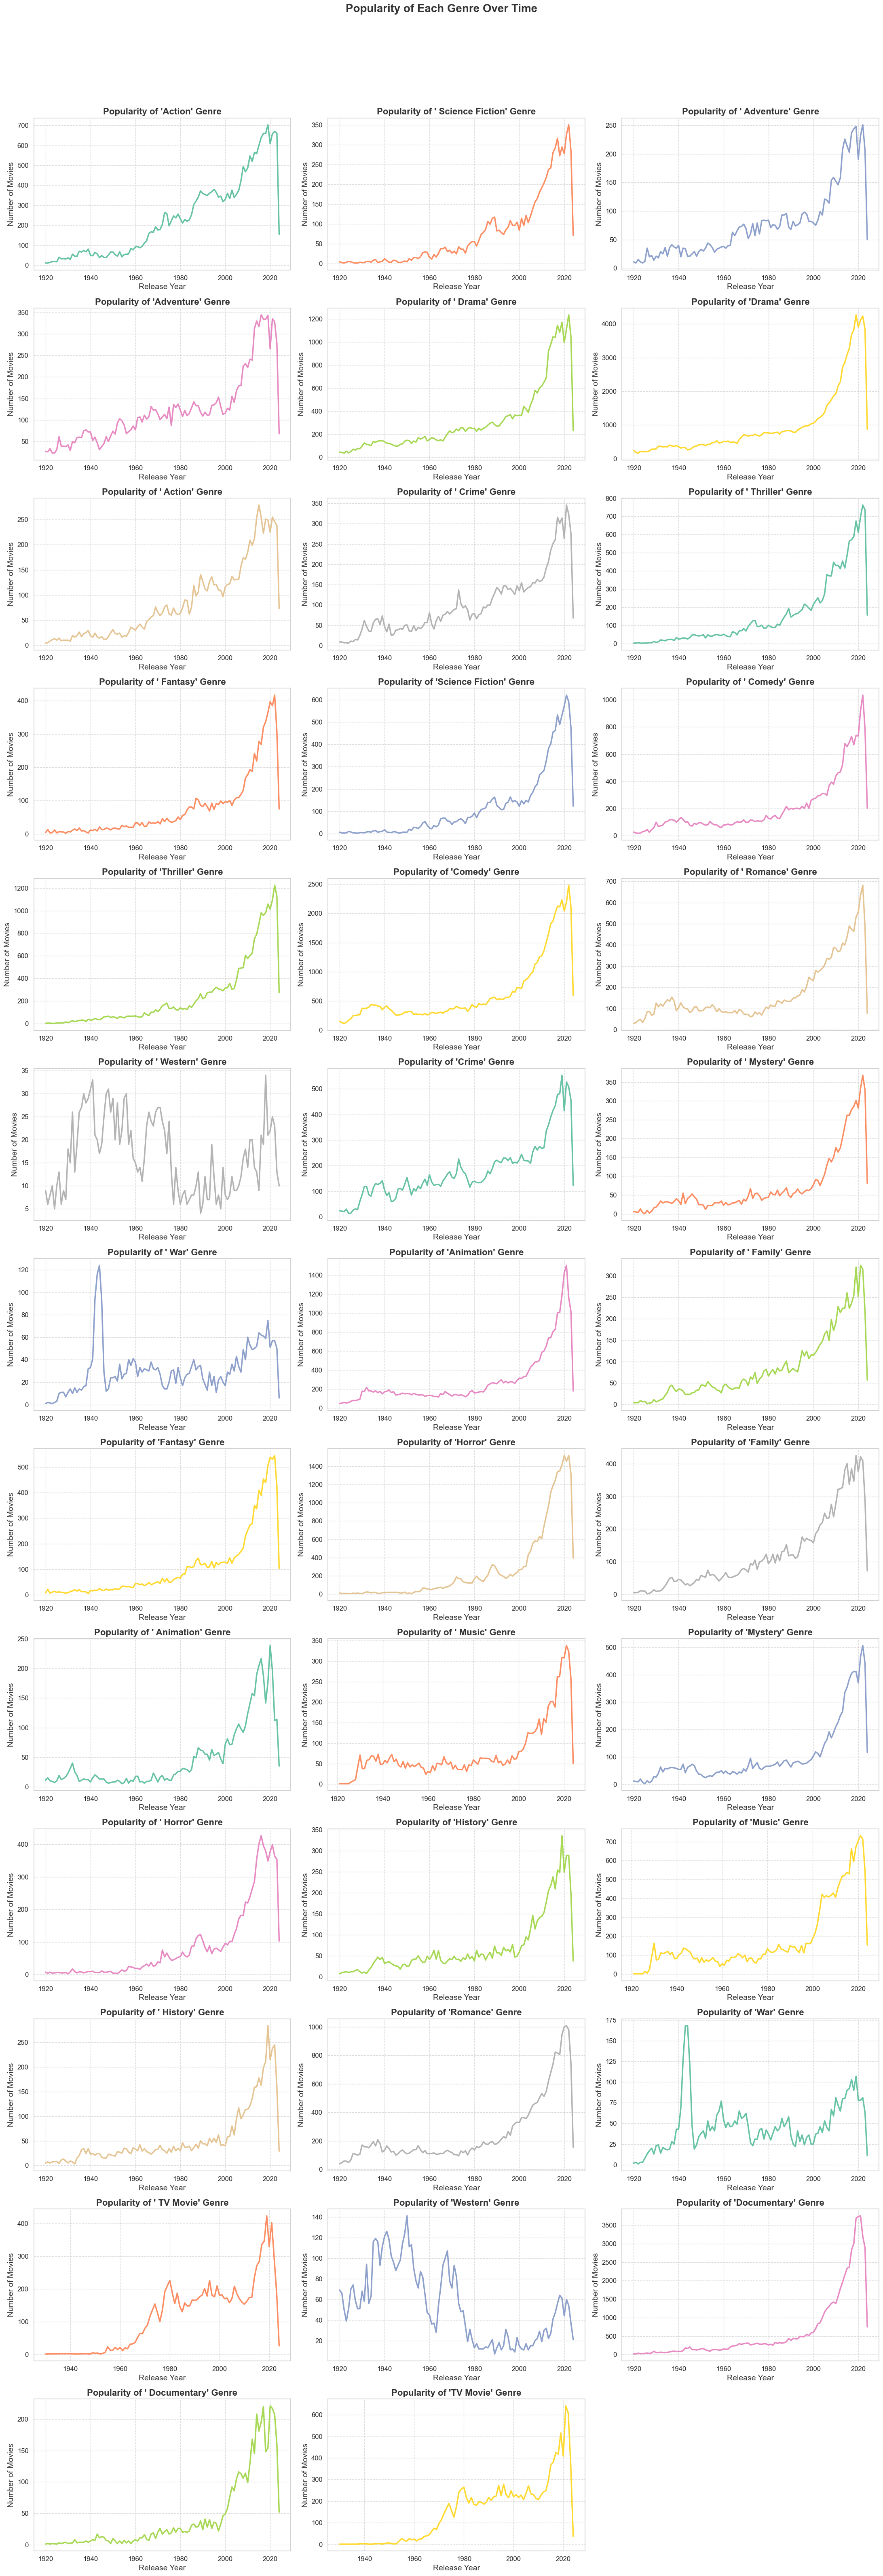

In [31]:
plt.figure(figsize=(17, 1))  # Spacer to improve layout
plt.show()

unique_genres = df["genres"].str.split(",").explode().unique()  # Get unique genres
num_genres = len(unique_genres)  # Number of genres

fig, axes = plt.subplots(  # Create subplots for each genre, arranged in 3 columns
    num_genres // 3 + (num_genres % 3 > 0), 3, figsize=(22, (num_genres // 3 + 1) * 5)
)
fig.suptitle(
    "Popularity of Each Genre Over Time",
    fontsize=20,
    fontweight="bold",
    color="#333333",
)

colors = sns.color_palette("Set2", num_genres)  # Color palette for different genres

# Iterate through unique genres and plot their popularity over time
for i, genre in enumerate(
    unique_genres
):  # Create a count of movies by year for the current genre

    df_genre_year = (
        df[df["genres"].str.contains(genre)]
        .groupby("release_year")
        .size()
        .reset_index(name="count")
    )

    # Calculate the row and column for the subplot
    row = i // 3
    col = i % 3

    sns.lineplot(  # Plot genre popularity
        data=df_genre_year,
        x="release_year",
        y="count",
        linewidth=2.5,
        ax=axes[row, col],
        color=colors[i % len(colors)],  # Use distinct colors for each genre
    )

    axes[row, col].set_title(  # Set titles and labels
        f"Popularity of '{genre}' Genre",
        fontsize=16,
        fontweight="bold",
        color="#333333",
    )
    axes[row, col].set_xlabel("Release Year", fontsize=14, color="#333333")
    axes[row, col].set_ylabel("Number of Movies", fontsize=14, color="#333333")
    axes[row, col].tick_params(axis="both", labelsize=12)

    axes[row, col].grid(
        True, linestyle="--", alpha=0.7
    )  # Add grid for better readability

for j in range(i + 1, num_genres // 3 * 3 + 3):  # Remove any empty subplots
    fig.delaxes(axes.flatten()[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to prevent overlap
plt.show()

### Outlier Detection in "Revenue"

<Figure size 1800x100 with 0 Axes>

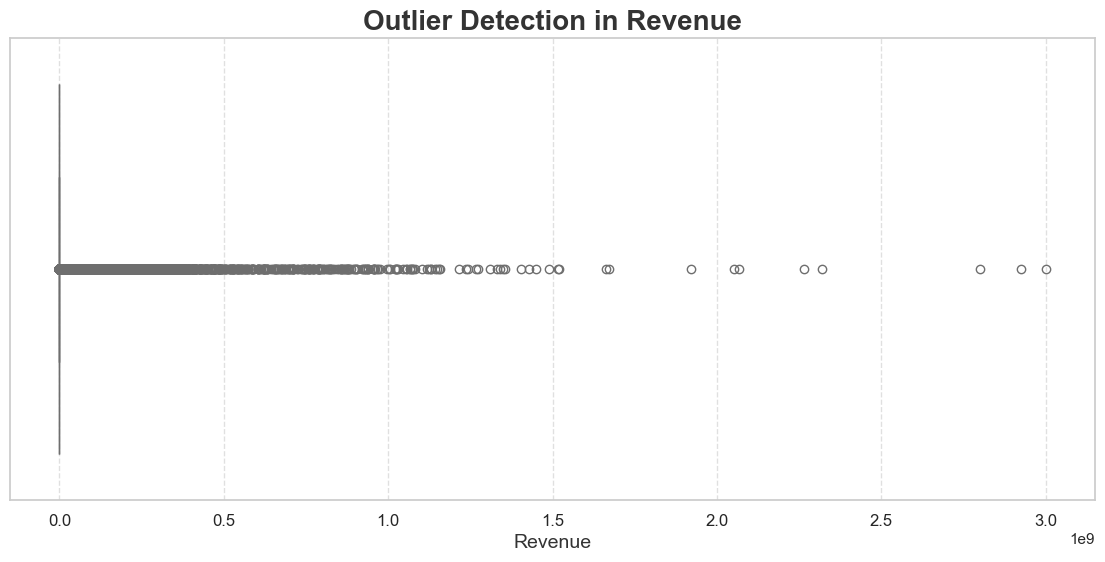

In [32]:
plt.figure(figsize=(18, 1))  # Spacer to improve layout
plt.show()

plt.figure(figsize=(14, 6))  # Outlier Detection: Revenue
sns.boxplot(x=df["revenue"], color="lightcoral")  # Boxplot to show outliers in revenue
plt.title(
    "Outlier Detection in Revenue", fontsize=20, fontweight="bold", color="#333333"
)
plt.xlabel("Revenue", fontsize=14, color="#333333")
plt.tick_params(axis="both", labelsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

### Correlation Heatmap for Selected Features

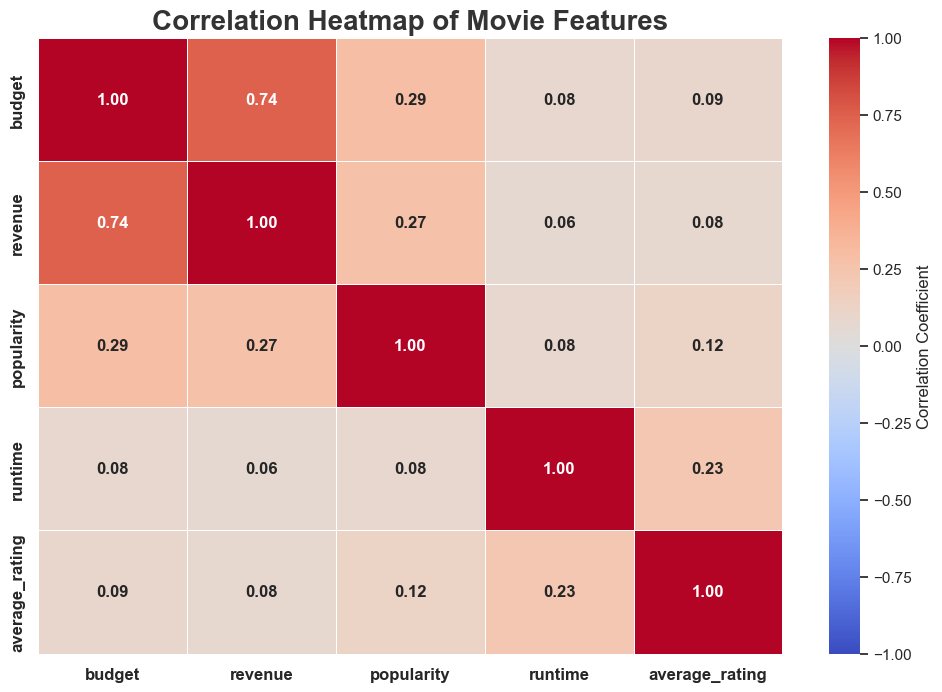

In [33]:
# Correlation Heatmap for Selected Features
plt.figure(figsize=(12, 8))
correlation_matrix = df[
    ["budget", "revenue", "popularity", "runtime", "average_rating"]
].corr()  # Calculate correlations

sns.heatmap(  # Create the heatmap with improvements
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",  # Changed color palette to 'coolwarm'
    cbar_kws={"label": "Correlation Coefficient"},  # Color bar label
    linewidths=0.5,  # Adds lines between cells for better separation
    linecolor="white",  # Change line color for better contrast
    vmin=-1,
    vmax=1,
    annot_kws={"size": 12, "weight": "bold"},  # Make annotations bolder
    cbar=True,
)  # Show color bar

plt.title(
    "Correlation Heatmap of Movie Features",
    fontsize=20,
    fontweight="bold",
    color="#333333",
)  # Title
plt.xticks(fontsize=12, fontweight="bold")  # Bold font for x-axis labels
plt.yticks(fontsize=12, fontweight="bold")  # Bold font for y-axis labels
plt.show()

Simple check for missing values in each Column:

In [34]:
missing_values = (
    df.isnull().sum()
)  # Check for remaining missing values in the DataFrame

missing_values = missing_values[
    missing_values > 0
]  # Filter to show only columns with missing values

print("Missing values in each column:")  # Display missing values
print(missing_values)

Missing values in each column:
Series([], dtype: int64)


In [35]:
df.head()

,title,average_rating,vote_count,release_date,revenue,runtime,budget,language,overview,popularity,genres,production_countries,release_year,release_month,release_day_of_week,language_full
0,Inception,8.364,34495,2010-07-15,825532764,148,160000000,en,"Cobb, a skilled thief who commits corporate es...",83.952,"Action, Science Fiction, Adventure","United Kingdom, United States of America",2010,7,3,English
1,Interstellar,8.417,32571,2014-11-05,701729206,169,165000000,en,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",2014,11,2,English
2,The Dark Knight,8.512,30619,2008-07-16,1004558444,152,185000000,en,Batman raises the stakes in his war on crime. ...,130.643,"Drama, Action, Crime, Thriller","United Kingdom, United States of America",2008,7,2,English
3,Avatar,7.573,29815,2009-12-15,2923706026,162,237000000,en,"In the 22nd century, a paraplegic Marine is di...",79.932,"Action, Adventure, Fantasy, Science Fiction","United States of America, United Kingdom",2009,12,1,English
4,The Avengers,7.710,29166,2012-04-25,1518815515,143,220000000,en,When an unexpected enemy emerges and threatens...,98.082,"Science Fiction, Action, Adventure",United States of America,2012,4,2,English


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302738 entries, 0 to 982848
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   title                 302738 non-null  object        
 1   average_rating        302738 non-null  float64       
 2   vote_count            302738 non-null  int64         
 3   release_date          302738 non-null  datetime64[ns]
 4   revenue               302738 non-null  int64         
 5   runtime               302738 non-null  int64         
 6   budget                302738 non-null  int64         
 7   language              302738 non-null  object        
 8   overview              302738 non-null  object        
 9   popularity            302738 non-null  float64       
 10  genres                302738 non-null  object        
 11  production_countries  302738 non-null  object        
 12  release_year          302738 non-null  int32         
 13  rele

#### Scaling all Numerical columns:

In [37]:
scaler = StandardScaler()  # Initialize the scaler

numeric_cols = [  # Select numeric columns to scale
    "budget",
    "revenue",
    "runtime",
    "popularity",
    "average_rating",
]  # Add any other relevant numeric features

df[numeric_cols] = scaler.fit_transform(
    df[numeric_cols]
)  # Fit and transform the selected columns

# Check the scaling
print(df[numeric_cols].head())  # Display the first few rows of the scaled features

      budget    revenue   runtime  popularity  average_rating
0  19.685042  26.597312  1.451124    6.233233        1.546310
1  20.303277  22.597959  1.830989   10.541590        1.562796
2  22.776218  32.380560  1.523479    9.806960        1.592347
3  29.205864  94.376735  1.704367    5.925543        1.300262
4  27.103864  48.993129  1.360679    7.314743        1.342878


Dropping irrelevant Columns for simplification: 

In [38]:
df.drop(
    columns=["title", "overview"], inplace=True
)  # Drop irrelevant or unnecessary columns

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302738 entries, 0 to 982848
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   average_rating        302738 non-null  float64       
 1   vote_count            302738 non-null  int64         
 2   release_date          302738 non-null  datetime64[ns]
 3   revenue               302738 non-null  float64       
 4   runtime               302738 non-null  float64       
 5   budget                302738 non-null  float64       
 6   language              302738 non-null  object        
 7   popularity            302738 non-null  float64       
 8   genres                302738 non-null  object        
 9   production_countries  302738 non-null  object        
 10  release_year          302738 non-null  int32         
 11  release_month         302738 non-null  int32         
 12  release_day_of_week   302738 non-null  int32         
 13  lang

Setting a temporary Dataframe from now on so that we don't have run the whole notebook from start if a code snippet disturbs the currently used Dataframe

In [40]:
df_temp = pd.DataFrame(df)

#### Encoding of "Genre"

In [41]:
df_temp["genres"] = df_temp["genres"].str.split(
    ", "
)  # Step 1: Split 'genres' into lists

df_exploded = df_temp.explode(
    "genres"
)  # Step 2: Explode the 'genres' column to create a row for each genre per movie

df_genre_dummies = (  # Step 3: One-hot encode the exploded 'genres' column
    pd.get_dummies(df_exploded["genres"]).groupby(df_exploded.index).sum()
)

df_final = pd.concat(
    [df_temp.drop(columns=["genres"]), df_genre_dummies], axis=1
)  # Step 4: Merge back with the original DataFrame (without the original 'genres' column if no longer needed)

print(
    "DataFrame after encoding genres:"
)  # Check the final DataFrame to confirm encoding
print(df_final.head())

DataFrame after encoding genres:
   average_rating  vote_count release_date    revenue   runtime     budget  \
0        1.546310       34495   2010-07-15  26.597312  1.451124  19.685042   
1        1.562796       32571   2014-11-05  22.597959  1.830989  20.303277   
2        1.592347       30619   2008-07-16  32.380560  1.523479  22.776218   
3        1.300262       29815   2009-12-15  94.376735  1.704367  29.205864   
4        1.342878       29166   2012-04-25  48.993129  1.360679  27.103864   

  language  popularity                      production_countries  \
0       en    6.233233  United Kingdom, United States of America   
1       en   10.541590  United Kingdom, United States of America   
2       en    9.806960  United Kingdom, United States of America   
3       en    5.925543  United States of America, United Kingdom   
4       en    7.314743                  United States of America   

   release_year  ...  History  Horror Music  Mystery  Romance  \
0          2010  ...    

In [42]:
df_final.head()

,average_rating,vote_count,release_date,revenue,runtime,budget,language,popularity,production_countries,release_year,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1.546310,34495,2010-07-15,26.597312,1.451124,19.685042,en,6.233233,"United Kingdom, United States of America",2010,...,0,0,0,0,0,1,0,0,0,0
1,1.562796,32571,2014-11-05,22.597959,1.830989,20.303277,en,10.541590,"United Kingdom, United States of America",2014,...,0,0,0,0,0,1,0,0,0,0
2,1.592347,30619,2008-07-16,32.380560,1.523479,22.776218,en,9.806960,"United Kingdom, United States of America",2008,...,0,0,0,0,0,0,0,1,0,0
3,1.300262,29815,2009-12-15,94.376735,1.704367,29.205864,en,5.925543,"United States of America, United Kingdom",2009,...,0,0,0,0,0,1,0,0,0,0
4,1.342878,29166,2012-04-25,48.993129,1.360679,27.103864,en,7.314743,United States of America,2012,...,0,0,0,0,0,1,0,0,0,0


#### Encoding of "language"

In [43]:
df_final = pd.get_dummies(  # Step 1: One-hot encode the 'language' column
    df_final, columns=["language"], prefix="", prefix_sep="", drop_first=True
)

print(
    "DataFrame after encoding languages:"
)  # Check the updated DataFrame to confirm encoding

print(df_final.head())

DataFrame after encoding languages:
   average_rating  vote_count release_date    revenue   runtime     budget  \
0        1.546310       34495   2010-07-15  26.597312  1.451124  19.685042   
1        1.562796       32571   2014-11-05  22.597959  1.830989  20.303277   
2        1.592347       30619   2008-07-16  32.380560  1.523479  22.776218   
3        1.300262       29815   2009-12-15  94.376735  1.704367  29.205864   
4        1.342878       29166   2012-04-25  48.993129  1.360679  27.103864   

   popularity                      production_countries  release_year  \
0    6.233233  United Kingdom, United States of America          2010   
1   10.541590  United Kingdom, United States of America          2014   
2    9.806960  United Kingdom, United States of America          2008   
3    5.925543  United States of America, United Kingdom          2009   
4    7.314743                  United States of America          2012   

   release_month  ...     fr     hi     it     ja     ko

In [44]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302738 entries, 0 to 982848
Data columns (total 44 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   average_rating        302738 non-null  float64       
 1   vote_count            302738 non-null  int64         
 2   release_date          302738 non-null  datetime64[ns]
 3   revenue               302738 non-null  float64       
 4   runtime               302738 non-null  float64       
 5   budget                302738 non-null  float64       
 6   popularity            302738 non-null  float64       
 7   production_countries  302738 non-null  object        
 8   release_year          302738 non-null  int32         
 9   release_month         302738 non-null  int32         
 10  release_day_of_week   302738 non-null  int32         
 11  language_full         302738 non-null  object        
 12  Action                302738 non-null  int64         
 13  Adve

#### Encoding of "production_countries"

In [45]:
df_final["production_countries"] = df_final["production_countries"].str.split(
    ","
)  # Step 1: Convert 'production_countries' to a list by splitting on commas

df_exploded_countries = df_final.explode(
    "production_countries"
)  # Step 2: Use explode to create a separate row for each country in 'production_countries'

df_exploded_countries["production_countries"] = (
    df_exploded_countries[  # Step 3: Remove any whitespace from the country names
        "production_countries"
    ].str.strip()
)
df_country_encoded = (
    pd.get_dummies(  # Step 4: One-hot encode the 'production_countries' column
        df_exploded_countries["production_countries"], prefix="country"
    )
)

df_exploded_countries = pd.concat(
    [df_exploded_countries, df_country_encoded], axis=1
)  # Step 5: Combine the dummy columns back with the exploded DataFrame

df_country_final = df_exploded_countries.groupby(
    df_exploded_countries.index
).sum(  # Step 6: Group by the original index to sum dummy columns, consolidating rows for each movie
    numeric_only=True
)

df_final = pd.concat(
    [df_final.drop(columns=["production_countries"]), df_country_final],
    axis=1,  # Step 7: Merge back with the main DataFrame, dropping the exploded 'production_countries'
)

print("DataFrame after encoding production countries:")  # Verify the final DataFrame

print(df_final.head())

DataFrame after encoding production countries:
   average_rating  vote_count release_date    revenue   runtime     budget  \
0        1.546310       34495   2010-07-15  26.597312  1.451124  19.685042   
1        1.562796       32571   2014-11-05  22.597959  1.830989  20.303277   
2        1.592347       30619   2008-07-16  32.380560  1.523479  22.776218   
3        1.300262       29815   2009-12-15  94.376735  1.704367  29.205864   
4        1.342878       29166   2012-04-25  48.993129  1.360679  27.103864   

   popularity  release_year  release_month  release_day_of_week  ...  \
0    6.233233          2010              7                    3  ...   
1   10.541590          2014             11                    2  ...   
2    9.806960          2008              7                    2  ...   
3    5.925543          2009             12                    1  ...   
4    7.314743          2012              4                    2  ...   

  country_Uganda  country_Ukraine  country_United A

In [46]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302738 entries, 0 to 982848
Columns: 195 entries, average_rating to country_Zimbabwe
dtypes: bool(13), datetime64[ns](1), float64(10), int32(6), int64(164), object(1)
memory usage: 419.5+ MB


In [47]:
df_final.head()

,average_rating,vote_count,release_date,revenue,runtime,budget,popularity,release_year,release_month,release_day_of_week,...,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States of America,country_Uruguay,country_Venezuela,country_Vietnam,country_Yugoslavia,country_Zimbabwe
0,1.546310,34495,2010-07-15,26.597312,1.451124,19.685042,6.233233,2010,7,3,...,0,0,0,1,1,0,0,0,0,0
1,1.562796,32571,2014-11-05,22.597959,1.830989,20.303277,10.541590,2014,11,2,...,0,0,0,1,1,0,0,0,0,0
2,1.592347,30619,2008-07-16,32.380560,1.523479,22.776218,9.806960,2008,7,2,...,0,0,0,1,1,0,0,0,0,0
3,1.300262,29815,2009-12-15,94.376735,1.704367,29.205864,5.925543,2009,12,1,...,0,0,0,1,1,0,0,0,0,0
4,1.342878,29166,2012-04-25,48.993129,1.360679,27.103864,7.314743,2012,4,2,...,0,0,0,0,1,0,0,0,0,0


#### Graphs after Data-Preprocessing (Scaled Numerical Data & Encoded Categorical Data):



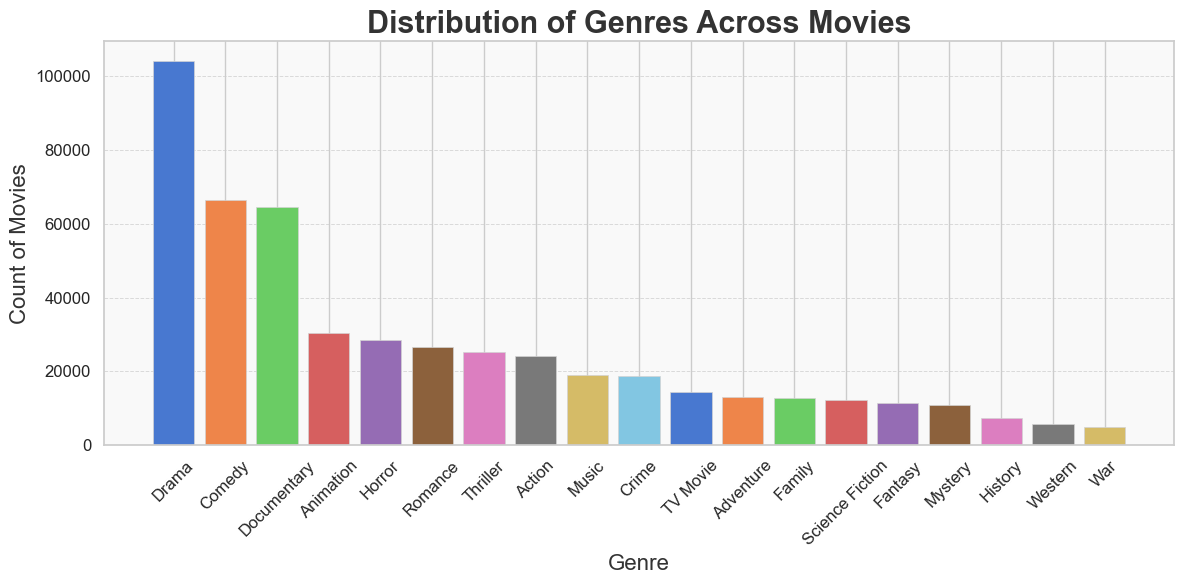

In [48]:
sns.set(style="whitegrid")
genre_counts = df_genre_dummies.sum().sort_values(
    ascending=False
)  # Calculate the count of each genre by summing across rows
colors = sns.color_palette("muted", len(genre_counts))  # Set a color palette
plt.figure(figsize=(12, 6))  # Plot the genre distribution
bars = plt.bar(
    genre_counts.index,
    genre_counts.values,
    color=colors,
    edgecolor="lightgray",
    linewidth=0.5,
)

# Improve aesthetics
plt.title(
    "Distribution of Genres Across Movies",
    fontsize=22,
    fontweight="bold",
    color="#333333",
)
plt.xlabel("Genre", fontsize=16, color="#333333")
plt.ylabel("Count of Movies", fontsize=16, color="#333333")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7, linewidth=0.7)

plt.gca().set_facecolor(
    "#f9f9f9"
)  # Adding a light background color for better aesthetics

plt.tight_layout()  # Tight layout adjustment
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_10872\3053753825.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


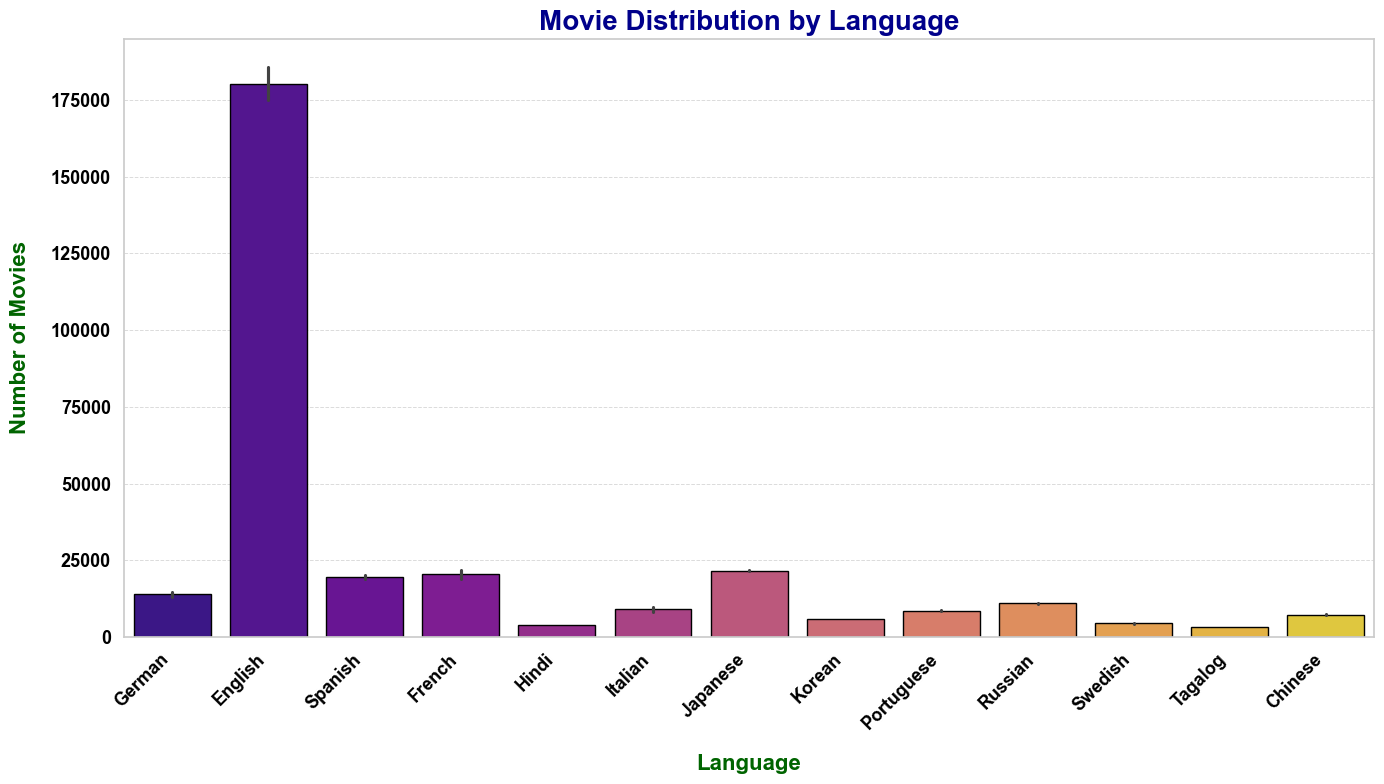

In [49]:
language_columns = [  # Define the list of language columns
    "de",
    "en",
    "es",
    "fr",
    "hi",
    "it",
    "ja",
    "ko",
    "pt",
    "ru",
    "sv",
    "tl",
    "zh",
]

sns.set(style="whitegrid")  # Set the visual style for the plots

language_full_names = {  # Dictionary to map language codes to full names
    "de": "German",
    "en": "English",
    "es": "Spanish",
    "fr": "French",
    "hi": "Hindi",
    "it": "Italian",
    "ja": "Japanese",
    "ko": "Korean",
    "pt": "Portuguese",
    "ru": "Russian",
    "sv": "Swedish",
    "tl": "Tagalog",
    "zh": "Chinese",
}

language_counts = df_final[
    language_columns
].sum()  # Calculate the counts of each language
language_counts.index = language_counts.index.map(
    language_full_names
)  # Replace codes with full names in the index

plt.figure(figsize=(14, 8))  # Plotting with an updated color palette and text styling
barplot = sns.barplot(
    x=language_counts.index,
    y=language_counts.values,
    palette="plasma",  # Changed color palette to 'plasma'
    edgecolor="black",
)

# Title and labels with color and bold style
plt.title(
    "Movie Distribution by Language", fontsize=20, weight="bold", color="darkblue"
)
plt.xlabel("Language", fontsize=16, weight="bold", color="darkgreen", labelpad=15)
plt.ylabel(
    "Number of Movies", fontsize=16, weight="bold", color="darkgreen", labelpad=15
)
plt.xticks(rotation=45, ha="right", fontsize=13, weight="bold", color="black")
plt.yticks(fontsize=13, weight="bold", color="black")

plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.7)  # Add grid lines
plt.tight_layout()
plt.show()

#### Removing countries columns with sum less than a specified threshold:

In [50]:
country_columns = df_final.filter(
    like="country_"
).columns.tolist()  # Step 1: Identify the country columns

country_counts = df_final[
    country_columns
].sum()  # Step 2: Calculate the counts of each country

countries_to_drop = country_counts[
    country_counts < 3000
].index  # Step 3: Identify countries with fewer than 3000 movies

df_final = df_final.drop(
    columns=countries_to_drop
)  # Step 4: Drop these columns from the DataFrame

print(
    "DataFrame after dropping countries with less than 3000 movies:"
)  # Verify the final DataFrame
print(df_final.head())

print(
    f"Remaining production country columns: {df_final.filter(like='country_').columns.tolist()}"
)

DataFrame after dropping countries with less than 3000 movies:
   average_rating  vote_count release_date    revenue   runtime     budget  \
0        1.546310       34495   2010-07-15  26.597312  1.451124  19.685042   
1        1.562796       32571   2014-11-05  22.597959  1.830989  20.303277   
2        1.592347       30619   2008-07-16  32.380560  1.523479  22.776218   
3        1.300262       29815   2009-12-15  94.376735  1.704367  29.205864   
4        1.342878       29166   2012-04-25  48.993129  1.360679  27.103864   

   popularity  release_year  release_month  release_day_of_week  ...  \
0    6.233233          2010              7                    3  ...   
1   10.541590          2014             11                    2  ...   
2    9.806960          2008              7                    2  ...   
3    5.925543          2009             12                    1  ...   
4    7.314743          2012              4                    2  ...   

  country_Japan  country_Mexico  co

3. "Movie" Distribution by "Countries":

C:\Users\hp\AppData\Local\Temp\ipykernel_10872\1623953838.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


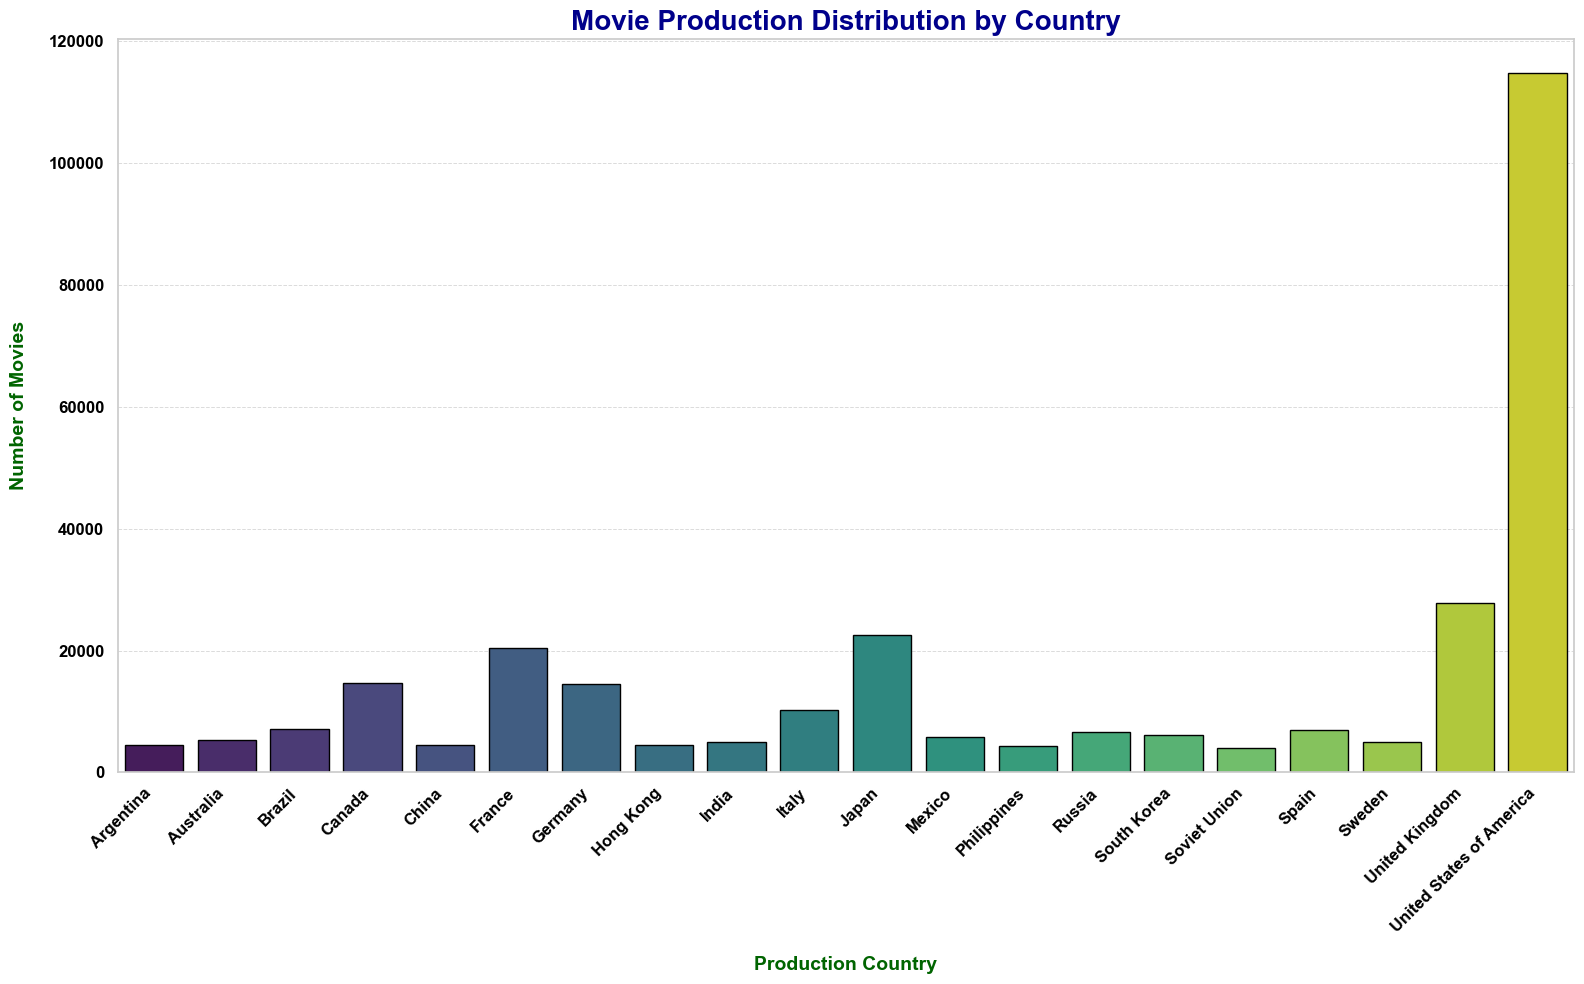

In [51]:
sns.set(style="whitegrid")  # Set the visual style for the plots

# Identify the country columns and clean up the names
country_columns = df_final.filter(like="country_").columns
country_names = [
    col.replace("country_", "").replace("_", " ") for col in country_columns
]  # Clean names

# Calculate the counts of each country
country_counts = df_final[country_columns].sum()
country_counts.index = country_names  # Set cleaned country names as index

plt.figure(figsize=(16, 10))  # Plotting with an updated color palette
barplot = sns.barplot(
    x=country_counts.index,
    y=country_counts.values,
    palette="viridis",  # Updated color palette
    edgecolor="black",
)

plt.title(  # Title and labels with colors and larger font
    "Movie Production Distribution by Country",
    fontsize=20,
    weight="bold",
    color="darkblue",
)
plt.xlabel(
    "Production Country", fontsize=14, weight="bold", color="darkgreen", labelpad=15
)
plt.ylabel(
    "Number of Movies", fontsize=14, weight="bold", color="darkgreen", labelpad=15
)
plt.xticks(rotation=45, ha="right", fontsize=12, weight="bold", color="black")
plt.yticks(fontsize=12, weight="bold", color="black")

plt.grid(
    axis="y", linestyle="--", linewidth=0.7, alpha=0.7
)  # Grid lines and layout adjustment
plt.tight_layout()

# Show the plot
plt.show()